   # Projeto 2 - Ciência do Dados
___

   ## Arthur Pansini; Enzo Fonteyne; Andre Faia.

<div id="introducao"></div>

## Introdução
<div id="apreobs"></div>

### Apresentação e Objetivos
Nosso projeto é focado na industria automobilistica, na qual utilizamos das variaveis ano de fabricação, modelo, tipo de câmbio e quilometros rodados para analizar quais dessas caracteristicas estão mais presentes em carros vendidos acima dos 20 mil dolares. Buscamos trazer uma base de dados ampla e com enorme diversidade de informações acerca do tema, para que se aproxime o maximo possível da realidade!

<div id="biblio"></div>

### Bibliotecas 

Para iniciar o desenvolvimento do projeto, devemos primeiramente importar algumas bibliotecas essenciais. Para as operações com a base de dados, utilizaremos a biblioteca Pandas para manipulação e análise de dados. Ademais, também utilizaremos a biblioteca de análise preditiva de dados Scikit-Learn (sklearn), da qual extrairemos algumas funções para geração dos modelos de regressão e, para a exibição dos dados e operações numéricas, utilizaremos as bilbiotecas matplotlib.pyplot e numpy, respectivamente. Além disso, utilizaremos a biblioteca Seaborn para produzir comparações visuais entre as variáveis. Todas as bibliotecas que serão utilizadas no projeto estão inseridas na célula abaixo, de forma a facilitar e tornar mais fluida a leitura do trabalho, não havendo necessidade de rodar células extras posteriormente.

In [307]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
from scipy.stats import norm, probplot
import statsmodels.api as sm


from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Para ter melhor print
from IPython.display import display

In [308]:
data = pd.read_csv("carros.csv")
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


Agora que ja encontramos e definimos a nossa base de dados precisamos saber um pouco mais sobre ela e já começar a fazer algumas alterações para melhorar a nossa análise! Como estamos trabalhando com um target quantitativo é ideal que trabalhemos apenas com variáveis quantitativas, sendo assim teremos que retirar ou alterar algumas colunas para podermos implementá-las na análise.

In [309]:
data.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [310]:
data.dtypes

ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

Agora que já temos um panorama inicial dos nosso dados vamos começar retirando algumas informações qualitativas que não iremos utilizar no nosso projeto.

In [311]:
filtro = data.loc[:,["Price", "Prod. year","Gear box type", "Mileage", 'Cylinders', 'Leather interior',
                    'Engine volume', 'Airbags']]

Selecionando apenas as variáveis quantitativas e algumas qualitativas, que iremos alterar para poder utilizá-las no projeto, podemos vizualiar a nova base de dados que será utilizada

In [312]:
filtro

,Price,Prod. year,Gear box type,Mileage,Cylinders,Leather interior,Engine volume,Airbags
0,13328,2010,Automatic,186005 km,6.0,Yes,3.5,12
1,16621,2011,Tiptronic,192000 km,6.0,No,3,8
2,8467,2006,Variator,200000 km,4.0,No,1.3,2
3,3607,2011,Automatic,168966 km,4.0,Yes,2.5,0
4,11726,2014,Automatic,91901 km,4.0,Yes,1.3,4
...,...,...,...,...,...,...,...,...
19232,8467,1999,Manual,300000 km,4.0,Yes,2.0 Turbo,5
19233,15681,2011,Tiptronic,161600 km,4.0,Yes,2.4,8
19234,26108,2010,Automatic,116365 km,4.0,Yes,2,4
19235,5331,2007,Automatic,51258 km,4.0,Yes,2,4


Antes de começar as manipulações precisamos conferir se todas as linhas estão completas, ou seja, verificar se não existem valores nulos na base de dados!

In [313]:
filtro.isnull().sum()

Price               0
Prod. year          0
Gear box type       0
Mileage             0
Cylinders           0
Leather interior    0
Engine volume       0
Airbags             0
dtype: int64

Parece que está tudo certo! Vamos continuar!

<div id="limpexp"></div>

# Limpeza  e Análise Exploratória

Nesse passo iremos realizar as manipulações necessárias para que seja possível tirar alguma conclusão da nossa base de dados. Primeiramente, como temos duas variáveis qualitativas, devemos transformá-las em variáveis dummy.

Uma variável dummy é aquela que toma valor 0 ou 1 para indicar a falta ou presença de um fator categórico que possa vir a mudar o resultado de uma análise. Elas podem ser vistas como representações numéricas de fatores qualitativos em um modelo de regressão, como é o caso deste projeto, dividindo uma variável em categorias opostas, como seria o caso da transmissão de um veículo: manual ou automático. A variável dummy que assume valor zero, indicará que aquela não exerce nenhum papel em influenciar o resultado do target (variável dependente). Por outro lado, quando esta assume valor 1, terá o efeito contrário.

No primeiro caso de substituição por dummies, temos a coluna `Gear box type`. Essa coluna, por sua vez possui 3 valores: Manual automatic, Triptonic e Variator. Dessa forma, ao transformarmos a coluna em dummy, utilizando a função `pd.get_dummies()` do pandas, iremos criar quatro novas colunas, uma para cada valor distinto da coluna. Assim cada linha será associada com um valor 0 ou 1 em cada uma das colunas, sendo que se é atribuido o valor 1 a uma dessas colunas, automaticamente o valor 0 é atribuído às demais.

Iremos realizar o mesmo procedimentos também com a coluna `Leather interior`, mas nesse caso criaremos apenas mais duas colunas, uma Yes e outra No, indicando em cada caso se o carro tem interior de couro ou não.

Para dar continuidade a nossa limpeza vamos dar mais uma olhada detalhada na nossa base de dados.

In [314]:
filtro.describe()

,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,1.855593e+04,2010.912824,4.582991,6.582627
std,1.905813e+05,5.668673,1.199933,4.320168
min,1.000000e+00,1939.000000,1.000000,0.000000
25%,5.331000e+03,2009.000000,4.000000,4.000000
50%,1.317200e+04,2012.000000,4.000000,6.000000
75%,2.207500e+04,2015.000000,4.000000,12.000000
max,2.630750e+07,2020.000000,16.000000,16.000000


Como podemos ver alguns valores como o Preço e o ano de produção variam muito, então para melhorar o nosso código vamos restringir esse valores atendendo aos objetivos do projeto. Como queremos prever o preço de venda de um carro popular vamos começar restringindo a coluna de preço, para que tenhamos apenas carros de 10mil a 120mil dólares, o que classificamos como carros populares, além disso vamos selecionar apenas carros que foram fabricados apartir de 2005, uma vez que queremos evitar carros de colecionadores na nossa análise. Carros de colecionadores são carros antigos de alta quilometragem mas que possuem um valor alto de venda, esse tipo de veículo atrapalha a nossa análise pois são pontos muito fora da curva.

In [315]:
data1 = (filtro.loc[filtro['Price']>=10000])
data1 = (data1.loc[data1['Price']<=120000])
data1 = (data1.loc[data1['Prod. year']>=2005])
data1 = (data1.loc[data1['Prod. year']<2020])
data1 = (data1.loc[data1['Cylinders']>0])

Pronto agora já selecionamos todas as colunas e linhas com que iremos trabalhar! Agora vamos realizar a limpeza dos caractéres nessas linhas e colunas!

In [316]:
data1.describe()

,Price,Prod. year,Cylinders,Airbags
count,10832.000000,10832.000000,10832.000000,10832.000000
mean,25573.755447,2012.805761,4.466581,6.466673
std,15781.673288,3.080841,1.128520,3.824851
min,10000.000000,2005.000000,1.000000,0.000000
25%,15053.000000,2011.000000,4.000000,4.000000
50%,20209.000000,2013.000000,4.000000,4.000000
75%,31047.000000,2015.000000,4.000000,10.000000
max,119172.000000,2019.000000,16.000000,16.000000


In [317]:
data1.head()

,Price,Prod. year,Gear box type,Mileage,Cylinders,Leather interior,Engine volume,Airbags
0,13328,2010,Automatic,186005 km,6.0,Yes,3.5,12
1,16621,2011,Tiptronic,192000 km,6.0,No,3,8
4,11726,2014,Automatic,91901 km,4.0,Yes,1.3,4
5,39493,2016,Automatic,160931 km,4.0,Yes,2,4
9,26657,2007,Automatic,128500 km,6.0,Yes,3.5,12


**Limpando a coluna Mileage**

Primeiro vamos limpar a coluna `Mileage`, para podermos trabalhar com essa coluna ela precisar ser quantitativa, para isso precisamos retiarar o 'km' escrito no final de cada cédula!

In [318]:
data1['Mileage'] = data['Mileage'].map(lambda x: x.lstrip('+-').rstrip(' km'))
data1['Mileage'] = data1['Mileage'].astype('int64')

Pronto! Já retiramos o 'km' e transformamos a coluna em 'int64' para podermos utilizá-la como uma variável quantitativa.

Agora que a coluna `Mileage` é quantitativa podemos realizar mais um limpeza nela, e selecionar apenas os veículos com menos de 500mil km, estamos fazendo isso pois existem alguns veículos nessa base de dados com quilometragens absurdas como 2 milhões de quilometros rodados e, como já dito anteriormente, queremos evitar esse 'casos' fora da curva.

In [319]:
data1 = (data1.loc[data1['Mileage']<=500000])

Vamos começar a transformar as variáveis qualitativas em dummies! Como explicado anteriormente, tranformar uma variável qualitativa em dummy significa atribuir um valor 0 ou 1 para indicar a falta ou a presença de uma valor categórico, para isso uma nova coluna para cada categoria será criada, onde em apenas uma dessa novas colunas o valor 1 será atribuído, indicando a presença do valor categórico, e à todas as outras o valor 0 será atribuído.

In [320]:
gear = pd.get_dummies(data1['Gear box type'])
interior = pd.get_dummies(data1['Leather interior'])

In [321]:
data1 = pd.concat([data1, gear], axis=1)
data1 = pd.concat([data1, interior], axis=1)
data1.head()

,Price,Prod. year,Gear box type,Mileage,Cylinders,Leather interior,Engine volume,Airbags,Automatic,Manual,Tiptronic,Variator,No,Yes
0,13328,2010,Automatic,186005,6.0,Yes,3.5,12,1,0,0,0,0,1
1,16621,2011,Tiptronic,192000,6.0,No,3,8,0,0,1,0,1,0
4,11726,2014,Automatic,91901,4.0,Yes,1.3,4,1,0,0,0,0,1
5,39493,2016,Automatic,160931,4.0,Yes,2,4,1,0,0,0,0,1
9,26657,2007,Automatic,128500,6.0,Yes,3.5,12,1,0,0,0,0,1


Se ainda ficou alguma dúvida à respeitos das variáveis dummies vamos explicar melhor utilizando os resultados obtidos como exemplo! Como podemos ver na cédula acima, foram adicionadas 6 novas colunas ao nosso dataset, quatro referetes ao `Gear box type` e duas referentes ao `Leather interior`. Vamos pegar como exemplo a primeira linha! Como podemos ver, o `Gear box type` desse carro é 'Automatic', por isso no temos na coluna `Automatic` o valor 1, e nas demais (Manual, Tiptronic e Variator), o valor 0. Ademais, na coluna `Leather interior`, o dataset nos informa que o interior do carro é de couro, sendo assim, temos no final do nosso dataset o valor 1 atribuído à coluna `Yes` e o valor 0 atribuído à coluna `No`.

**Limpando a coluna Engine volume**

Agora vamos limpar a coluna `Engine volume`, temos que limpar essa colunas pois alguns carros tem a classificação 'Turbo', para podermos trabalhar com esses valores precisamos transformar essa variável em 'float64', e para isso precisamos retirar qualquer escrita.

In [322]:
data1['Engine volume'] = data1['Engine volume'].map(lambda x: x.lstrip('+-').rstrip(' Turbo'))
data1['Engine volume'] = data1['Engine volume'].astype('float64')

In [323]:
data1 = (data1.loc[data1['Engine volume']<=12])
data1 = (data1.loc[data1['Engine volume']>0])

Ufa! Finalmente terminamos as limpezas do nosso dataset e podemos partir para a análise exploratória! Vamos só dar mais uma olhada de como ficou o nosso dataset depois de todas essa alterações!

In [324]:
data1.head()

,Price,Prod. year,Gear box type,Mileage,Cylinders,Leather interior,Engine volume,Airbags,Automatic,Manual,Tiptronic,Variator,No,Yes
0,13328,2010,Automatic,186005,6.0,Yes,3.5,12,1,0,0,0,0,1
1,16621,2011,Tiptronic,192000,6.0,No,3.0,8,0,0,1,0,1,0
4,11726,2014,Automatic,91901,4.0,Yes,1.3,4,1,0,0,0,0,1
5,39493,2016,Automatic,160931,4.0,Yes,2.0,4,1,0,0,0,0,1
9,26657,2007,Automatic,128500,6.0,Yes,3.5,12,1,0,0,0,0,1


<div id="testtrain"></div>

### Criando base de teste e treinamento

Antes de iniciarmos a análise exploratória vamos primeiro separar a nossa base de dados em treinamento e teste. Como você já deve ter imaginado, a base de treinamento serve para treinar o algoritmo de previsão, ou seja, entregamos ao algoritmo uma parte da nossa base de dados para ele analisar padrões e correlações entre as variáveis, para que depois, com base no que ele 'aprendeu' o algoritmo possa prever resultados, essas previsões serão comparadas com a base de teste, deste modo teremos um feedback da eficiência do nosso modelo.
Para realizar essa separação iremos utilizar a função `train_test_split` importada da biblioteca ScikitLearn. Como queremos melhorar o desempenho do nosso modelo vamos separar 80% dos dados para a base de treinamento, e 20% para a base de testes, desta forma o poderemos treinar bastante o nosso modelo, o que irá contribuir positivamente na qualidade da previsão.

In [325]:
dados_treinamento, dados_teste = train_test_split(data1, test_size=0.2, random_state=1)

Após a separação vamos dar uma olhada para ver se as bases de dados estão parecidas!

In [326]:
dados_treinamento.describe()

,Price,Prod. year,Mileage,Cylinders,Engine volume,Airbags,Automatic,Manual,Tiptronic,Variator,No,Yes
count,8580.000000,8580.000000,8580.000000,8580.000000,8580.000000,8580.000000,8580.000000,8580.000000,8580.000000,8580.000000,8580.000000,8580.000000
mean,25765.251981,2012.803380,123006.420280,4.480420,2.248916,6.502331,0.676923,0.051981,0.221329,0.049767,0.261538,0.738462
std,15953.845885,3.086757,78237.089572,1.138693,0.799262,3.836302,0.467679,0.222002,0.415165,0.217476,0.439498,0.439498
min,10000.000000,2005.000000,0.000000,1.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15053.000000,2011.000000,66661.000000,4.000000,1.800000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20385.000000,2013.000000,112939.500000,4.000000,2.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,31361.000000,2015.000000,162961.000000,4.000000,2.500000,10.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,119172.000000,2019.000000,500000.000000,16.000000,6.400000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [327]:
dados_teste.describe()

,Price,Prod. year,Mileage,Cylinders,Engine volume,Airbags,Automatic,Manual,Tiptronic,Variator,No,Yes
count,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000
mean,25325.402797,2012.794406,122666.892774,4.419580,2.217855,6.385082,0.689044,0.049417,0.212587,0.048951,0.255478,0.744522
std,15187.041933,3.050136,77949.723116,1.086806,0.744027,3.803224,0.462993,0.216788,0.409234,0.215816,0.436231,0.436231
min,10000.000000,2005.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15367.000000,2011.000000,66196.000000,4.000000,1.800000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20005.000000,2013.000000,113724.000000,4.000000,2.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,30734.000000,2015.000000,161318.000000,4.000000,2.500000,10.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,119172.000000,2019.000000,488038.000000,16.000000,5.700000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Como podemos ver as duas bases de dados estão bem parecidas! Isso aconteceu porque os dados foram embaralhados antes de serem separados. Com excessão da linha `count`, todos os outros valores estão bem parecios! Lembrando que a divergência na linha count já era esperada pois as bases de dados têm tamanhos diferentes!

<div id="analise"></div>

## Análise exploratória

Pronto! Finalmente podemos começar a nossa análise exploratória!

Nessa etapa vamos analisar as relações entre cada uma das variáveis da base de dados. Essa análise serve para podermos encontrar as variáveis que mais influenciam a nossa variável target. Dessa forma, podemos aperfeiçoar o nosso modelo fazendo ele focar apenas nas variáveis mais relevantes e ignorando algumas que podem atrapalhá-lo! Para isso vamos utilizar a fnção `pairplot()` da biblioteca seaborn. Essa função nos ajuda a visualizar graficamente a influência de uma variável na outra! 

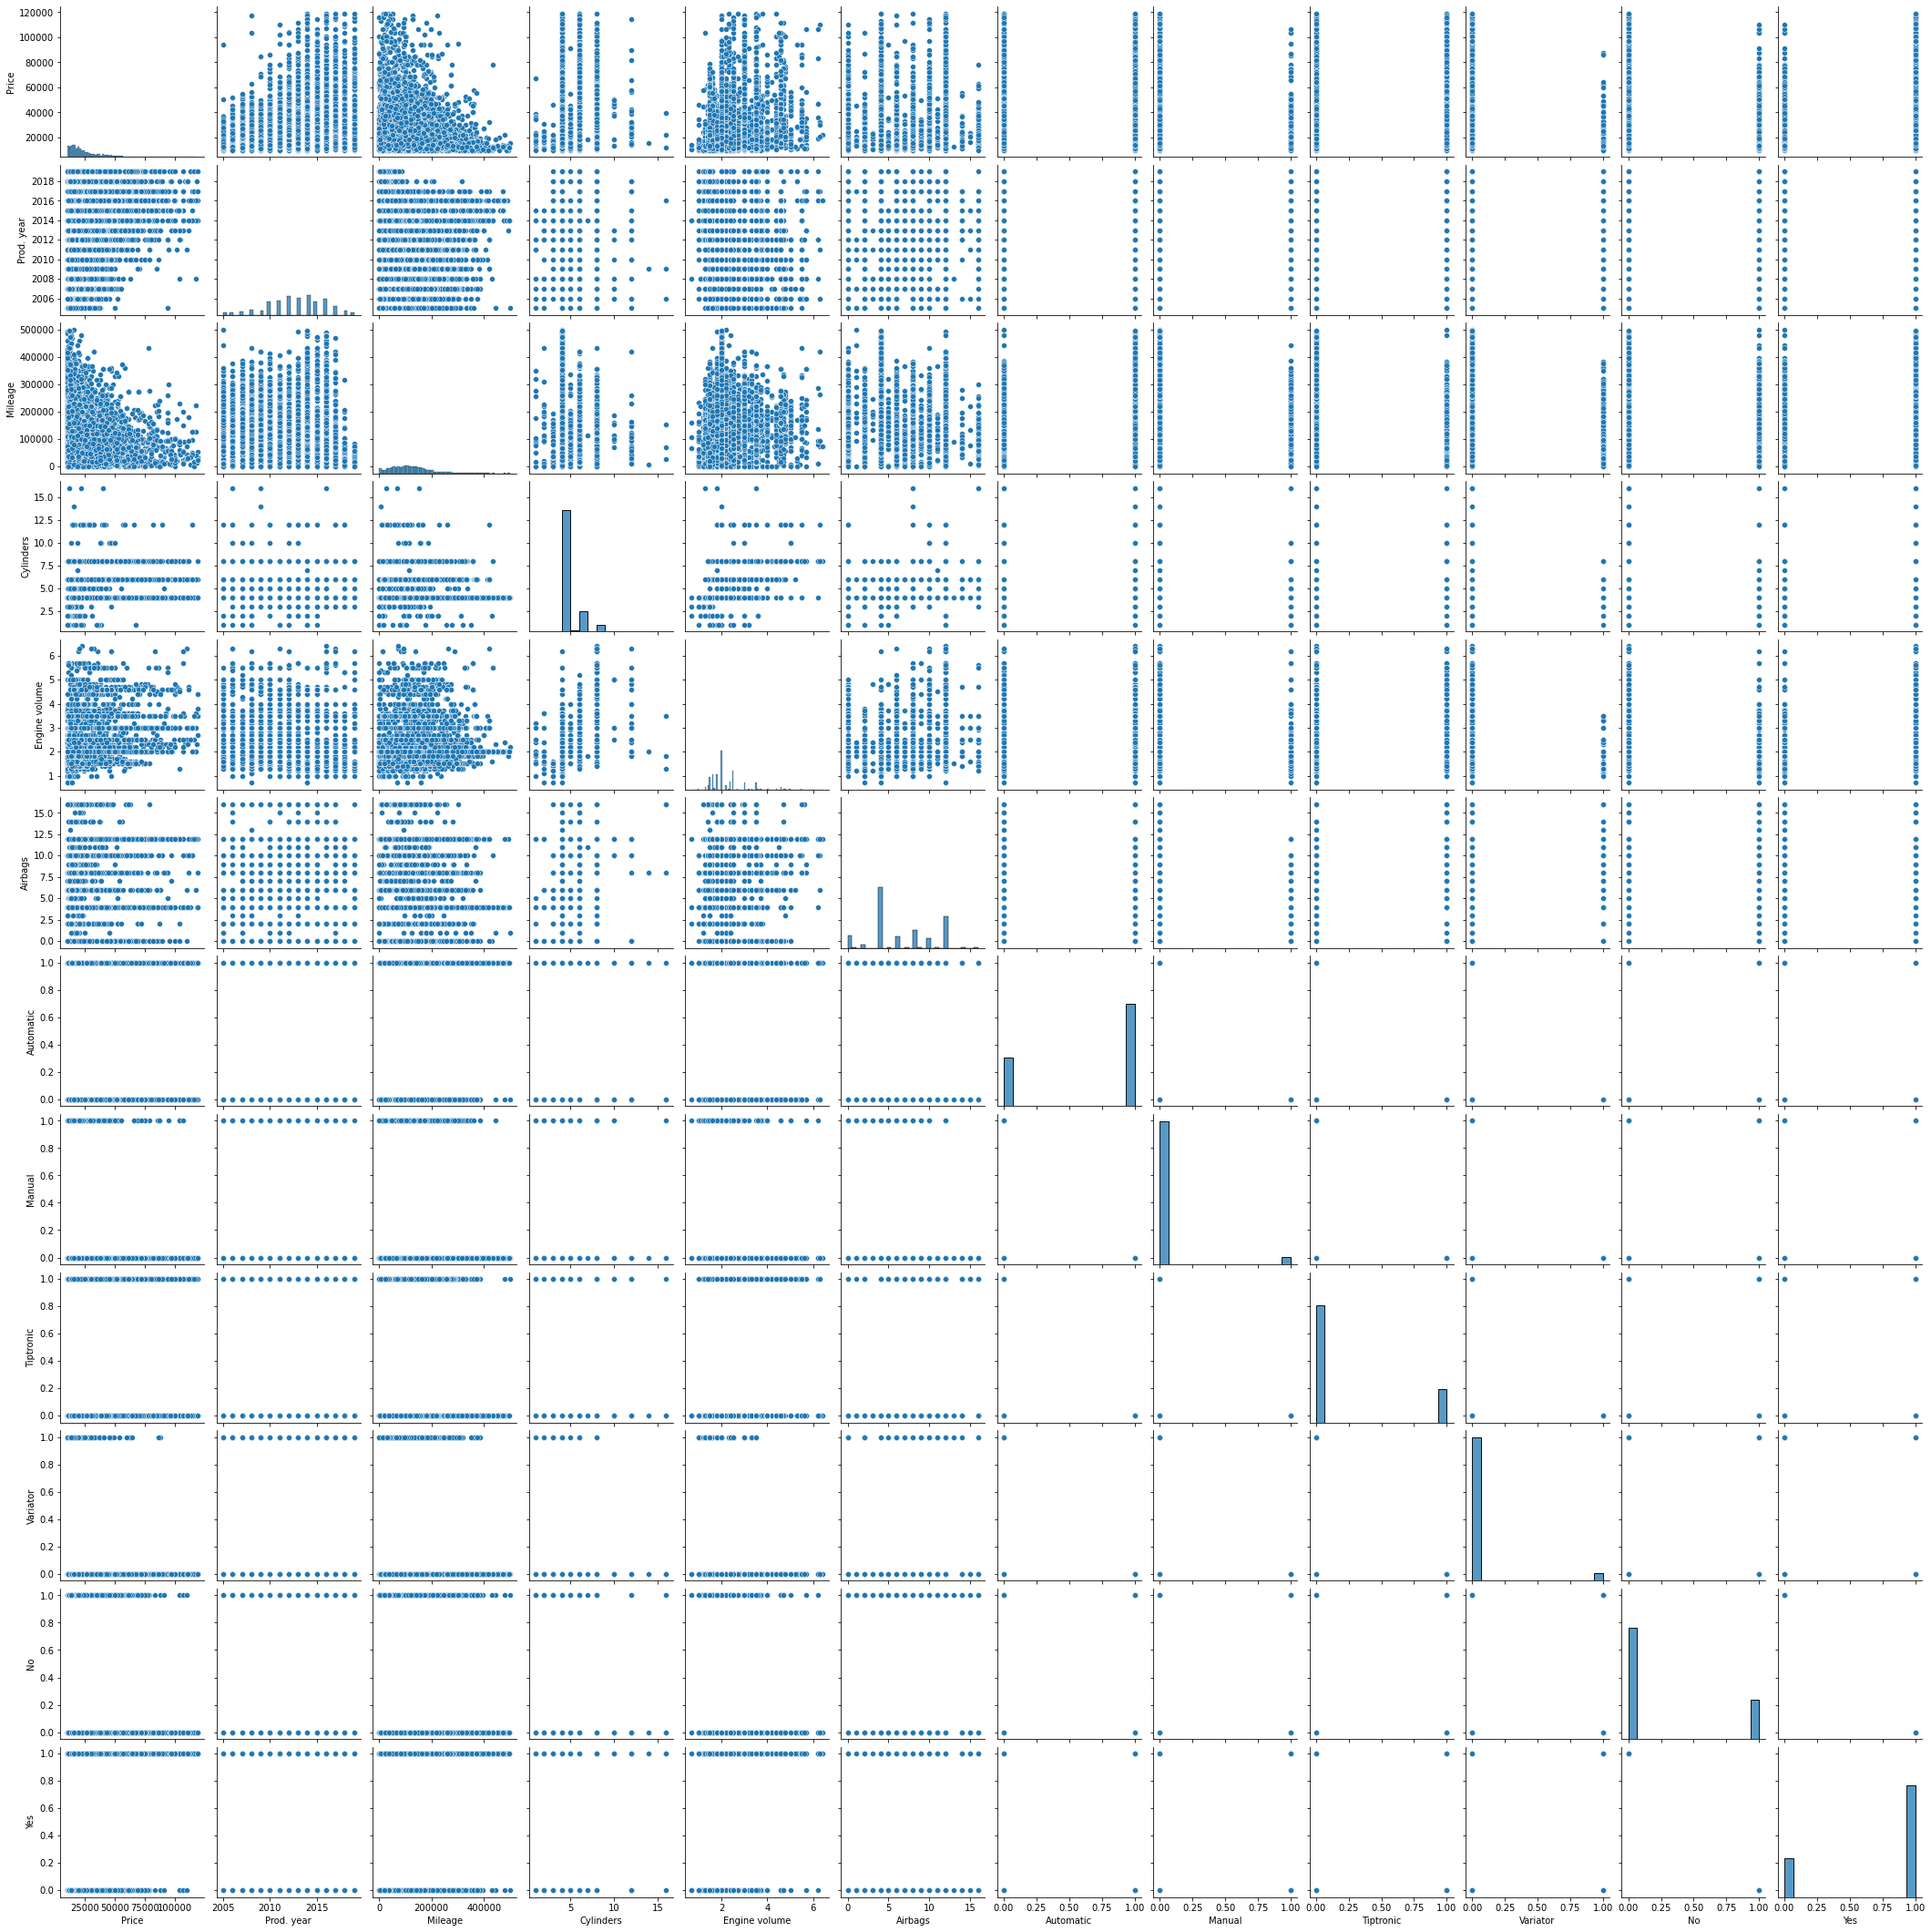

In [328]:
sns.pairplot(data1)

Hmm, esse monte de gráfico pequeno não está nos ajudando muito a tirar alguma conclusão dessas comparações né?

Bom, como o objetivo do nosso projeto é prever o preço de um carro popular com base em diversas variáveis vamos fazer um novo `pairplot()` focando agora no que realmente interessa, vamos plotar gráficos que mostram a influência das demais variáveis apenas na nossa variável target!

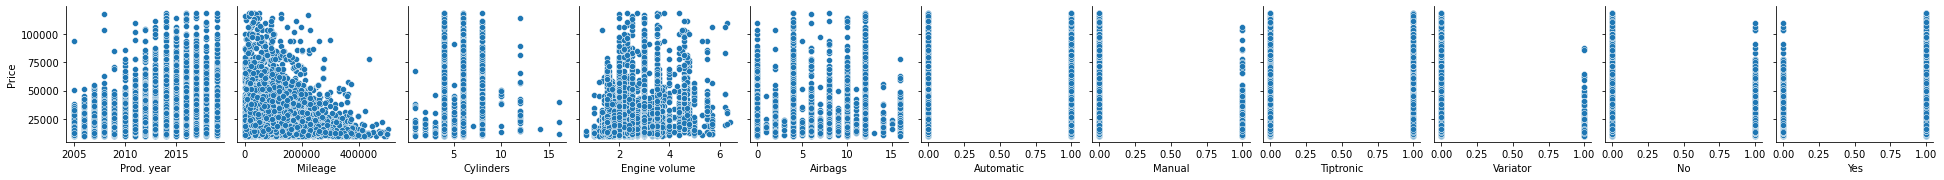

In [329]:
sns.pairplot(data1, x_vars=["Prod. year", "Mileage", 'Cylinders',
                    'Engine volume', 'Airbags', 'Automatic', 'Manual', 'Tiptronic', 'Variator', 'No', 'Yes',], y_vars=['Price'])

Outra maneira que podemos utilizar para visualizar os dados é através de um mapa de calor (heatmap). Esse mapa nos fornece a correlação entre todas as variáveis que definiremos a seguir. Correlação é uma relação que envolve a dependência entre duas variáveis, ou seja, analisando a correlação entre as variáveis independentes e a variável target podemos achar aquelas que mais influenciam no preço do carro, vale ressaltar que a correlação varia (em módulo, pois pode ser negativa) de 0 a 1, e quanto mais próximo de 1, maior é a correlação entre as variáveis, ou seja, maior a dependência entre elas.

Além disso iremos separar as bases de dados nas variáveis independentes `X_treinamento` e `X_teste`, e nas variáveis target `Y_treinamento` e `Y_teste`, para que possam ser comparadas no mapa de calor e nos modelos de regressão.

In [330]:
X_treinamento = dados_treinamento[["Prod. year", "Mileage", 'Cylinders',
                    'Engine volume', 'Airbags', 'Automatic', 'Manual', 'Tiptronic', 'Variator', 'No', 'Yes']]
Y_treinamento = dados_treinamento['Price']


X_teste = dados_teste[["Prod. year", "Mileage", 'Cylinders',
                    'Engine volume', 'Airbags', 'Automatic', 'Manual', 'Tiptronic', 'Variator', 'No', 'Yes']]
Y_teste = dados_teste['Price']

A cédula abaixo produz o mapa de calor, cuja função faz parte da biblioteca `seaborn` e já foi importada no início do notebook

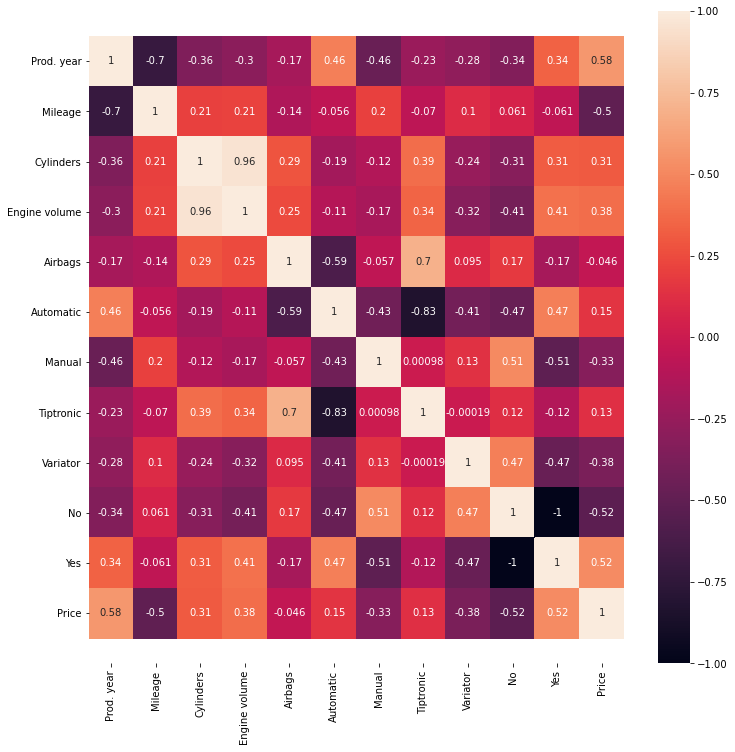

In [332]:
correlations = pd.concat([X_treinamento, pd.Series(Y_treinamento)], axis=1).corr()

plt.figure(figsize=(12,12))
df_corr = correlations.corr()
ax = sns.heatmap(df_corr, annot=True) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

**Plotando os gráficos das variáveis que aparentam influenciar no preço**

Antes de começar a regressão linear vamos analisar separadamente a influência de cada variável na nossa variável target, vamos cruzar as informações obtidas nos gráficos seguintes com as correlações apresentadas pelo heatmap.

**Quilometragem x Preço**

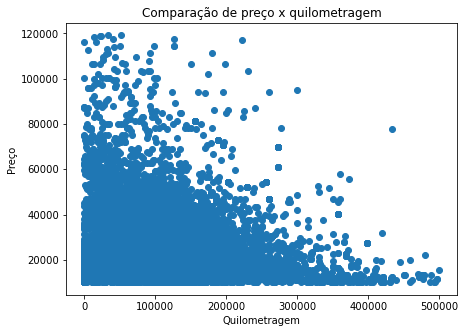

In [333]:
plt.figure(figsize=(7,5))
plt.scatter(data1['Mileage'], data1['Price'])
plt.title('Comparação de preço x quilometragem')
plt.ylabel('Preço')
plt.xlabel('Quilometragem')
plt.show()

Como podemos ver existe uma correlação negativa, essa mesma correlação já havia sido apresentada pelo heatmap, corr=-0.51, apesar de o número não se aproximar tanto de 1, o que seria o ideal, se formos comparar com as outras correlações essa é uma das maiores, portanto iremos utilizá-la no nosso modelo!

**Ano de produção x Preço**

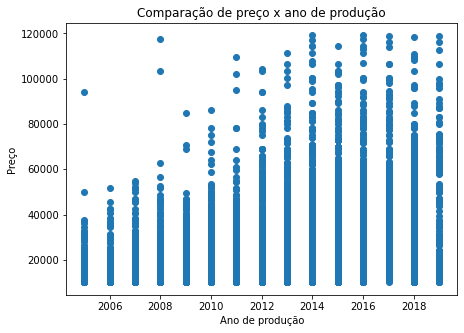

In [334]:

plt.figure(figsize=(7,5))
plt.scatter(data1['Prod. year'], data1['Price'])
plt.title('Comparação de preço x ano de produção')
plt.ylabel('Preço')
plt.xlabel('Ano de produção')
plt.show()

Agora temos uma correlação entre o ano de fabricação do veículo e o preço dele, como já era de se esperar, esse gráfico nos mostra que quanto mais novo o carro, maior é o seu preço, o que faz todo o sentido. Com isso podemos concluir que é uma correlação positiva, essa afirmação está de acordo com o resultado obtido no heatmap, além disso, dentre todas as correlções, essa é a maior, portanto também iremos utilizá-la.

Apesar da correlação Ano de produção x Preço ser a maior de todas, corr=0.59 não é um número muito alto e satisfatório, todavia, como é o maior que temos, iremos utilizá-lo, vale ressaltar que ao utilizar correlações baixas podemos afetar a previsão do modelo.

**Volume do motor x Preço**

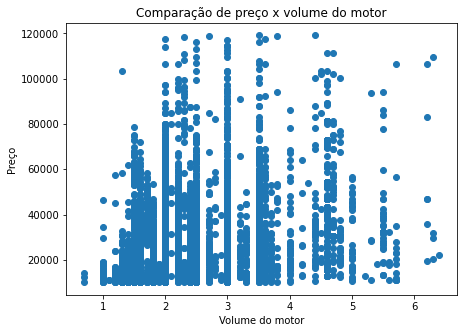

In [335]:
plt.figure(figsize=(7,5))
plt.scatter(data1['Engine volume'], data1['Price'])
plt.title('Comparação de preço x volume do motor')
plt.ylabel('Preço')
plt.xlabel('Volume do motor')
plt.show()

Nesse gráfico já não fica tão clara a correlação, por isso vamos apenas confiar no nosso heatmap, segundo ele a correlação nesse caso é corr=0.39

**Cilindradas x Preço**

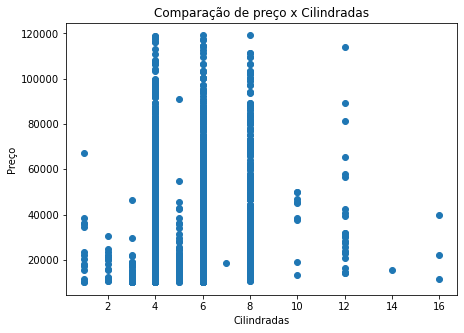

In [336]:
plt.figure(figsize=(7,5))
plt.scatter(data1['Cylinders'], data1['Price'])
plt.title('Comparação de preço x Cilindradas')
plt.ylabel('Preço')
plt.xlabel('Cilindradas')
plt.show()

Novamente não conseguimos identificar uma correlação através do gráfico, sendo assim vamos novamente recorrer ao heatmap, segundo ele a correlação nesse caso é corr=0.32

**Iniciando a regressão**

Agora vamos dar início a função regress, que recebe dois inputs, o Target: a nossa variável preço (Y), e os Features: as variáveis que se relacionam e interferem no valor de Y, essa variáveis são o input (X) na função.

In [337]:
### Função utilitária para fazer a regressão com constante adicionada

def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

Abaixo, usamos a função regress na base de dados treinamento restringido, essa é uma nova base de dados que exclui algumas variáveis que possuiam correlações baixas, como mostrado pelo heatmap.

In [338]:
X_treinamento_restringido = dados_treinamento[["Prod. year", 'Mileage', 'Cylinders',
                    'Engine volume', 'Manual', 'Variator', 'No', 'Yes']]
Y_treinamento = dados_treinamento['Price']

resultados_treinamento = regress(Y_treinamento,X_treinamento_restringido)
resultados_treinamento.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     612.0
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:44:04   Log-Likelihood:                -93468.
No. Observations:                8580   AIC:                         1.870e+05
Df Residuals:                    8572   BIC:                         1.870e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -2.82e+06   7.06e+04    -39.952      0.000   -2.96e+06   -2.68e+06
Prod. year     2106.1547     52.502     40.116      0.000    2003.238    2209.072
Mileage          -0.0297      0.002    -15.114      0.000      -0.034      -0.026
Cylinders       753.4783    194.865      3.867      0.000     371.496    1135.460
Engine volume  6765.9012    283.422     23.872      0.000    6210.326    7321.476
Manual         6502.0008    676.745      9.608      0.000    5175.418    7828.584
Variator       1658.4415    676.057      2.453      0.014     333.206    2983.677
No            -1.412e+06   3.53e+04    -40.047      0.000   -1.48e+06   -1.34e+06
Yes           -1.408e+06   3.53e+04    -39.856      0.000   -1.48e+06   -1.34e+06
==============================================================================
Omnibus:                     2669.039   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13875.619
Skew:                           1.405   Prob(JB):                         0.00
Kurtosis:                       8.561   Cond. No.                     7.90e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.92e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Analisando a coluna `P>|t|` podemos perceber que grande parte das variáveis são relevantes, mas podemos fazer mais uma limpeza e retirar 'Variator' da nossa base de dados!

In [339]:
X_treinamento_restringido = dados_treinamento[["Prod. year", 'Mileage', 'Cylinders',
                    'Engine volume', 'Manual',  'No', 'Yes']]
Y_treinamento = dados_treinamento['Price']

resultados_treinamento = regress(Y_treinamento,X_treinamento_restringido)
resultados_treinamento.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     712.6
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:44:08   Log-Likelihood:                -93471.
No. Observations:                8580   AIC:                         1.870e+05
Df Residuals:                    8573   BIC:                         1.870e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -2.8e+06   7.01e+04    -39.928      0.000   -2.94e+06   -2.66e+06
Prod. year     2091.1612     52.160     40.091      0.000    1988.914    2193.408
Mileage          -0.0296      0.002    -15.043      0.000      -0.033      -0.026
Cylinders       761.9148    194.892      3.909      0.000     379.880    1143.949
Engine volume  6700.3766    282.243     23.740      0.000    6147.113    7253.641
Manual         6267.8310    670.175      9.353      0.000    4954.128    7581.534
No            -1.402e+06    3.5e+04    -40.026      0.000   -1.47e+06   -1.33e+06
Yes           -1.398e+06   3.51e+04    -39.829      0.000   -1.47e+06   -1.33e+06
==============================================================================
Omnibus:                     2673.410   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13874.167
Skew:                           1.408   Prob(JB):                         0.00
Kurtosis:                       8.557   Cond. No.                     7.97e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.87e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Pronto, agora parece que está tudo certo, segundo a tabela acima todas as variáveis são relevantes!

Abaixo é feita a previsão final, usando apenas as variáveis relevantes para a previsão e aplicando a função `regress()` para que, através do método da regressão linear, o nosso modelo possa prever, usando as variáveis dependentes e sua correlação com o preço, qual será o preço predito para cada carro. 

In [340]:
X_teste_restringido = dados_teste[["Prod. year", 'Mileage', 'Cylinders',
                    'Engine volume', 'Manual', 'No', 'Yes']]
Y_teste = dados_teste[['Price']]
X_teste_completo = sm.add_constant(X_teste_restringido)
Y_previsto = resultados_treinamento.predict(X_teste_completo)

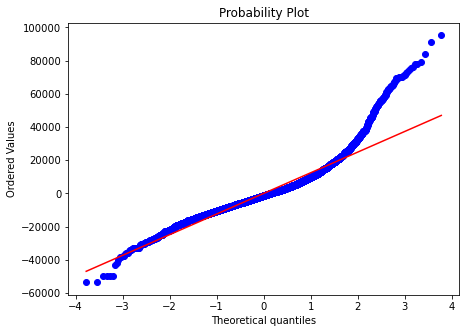

In [341]:
preco = resultados_treinamento.resid

plt.figure(figsize=(7,5))
probplot(preco, dist='norm', plot=plt);

Abaixo foi plotado o gráfico de valores observador x valores previstos pelo nosso modelo, com a linha vermelha sendo a bissetriz, o que seria o ideal de acerto do modelo, 100%, no entanto, com os erros, evidentemente os pontos variam acima e abaixo da linha.

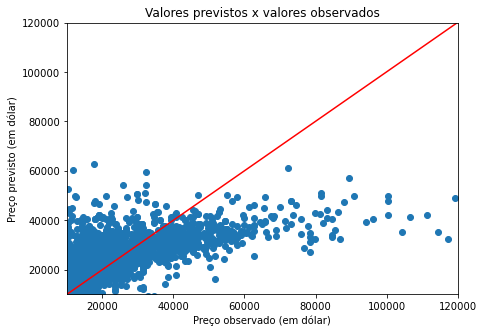

In [342]:
plt.figure(figsize=(7,5))
plt.scatter(Y_teste,Y_previsto)
plt.plot([10000,120000],[10000,120000], color='red')
plt.title('Valores previstos x valores observados')
plt.ylabel('Preço previsto (em dólar)')
plt.xlabel('Preço observado (em dólar)')
plt.xlim(10000,120000)
plt.ylim(10000,120000)
plt.show()

Relacionado ao gráfico anterior, abaixo está o erro absoluto de cada ponto, sendo o ideal uma linha reta no 0 (100% de acurácia), no entanto, o nosso modelo, com seus erros variou tanto ultrapassando o valor, quanto para menos.

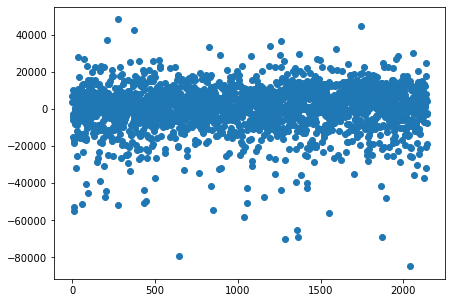

In [343]:
y=[]

x = np.arange(0,2145,1)
for i in range(2145):
    y.append(Y_previsto.iloc[i] - Y_teste.iloc[i])

    
plt.figure(figsize=(7,5))    
plt.scatter(x,y)
plt.show()

Como podemos observar a maioria dos pontos previstos ficou em torno de zero, o que mostra que, se o nosso modelo está cometendo algum erro, ele não é muito grave, já que,os valores, por mais que não sejam exatos, eles se aproximam bastante dos preços reais.

Aqui temos a porcentagem de acerto do nosso modelo, definido pelo score

In [344]:
print(f"Score da regressão linar calculado por R^2 = {r2_score(Y_teste, Y_previsto)}")

Score da regressão linar calculado por R^2 = 0.3315996589727004


In [345]:
erro = np.sqrt(mean_squared_error(Y_teste,Y_previsto))
erro2 = mean_absolute_error(Y_teste,Y_previsto)

print(f'O erro quadrático médio foi: {erro:.2f} dólares')
print(f'O erro absoluto médio foi: {erro2:.2f} dólares')

O erro quadrático médio foi: 12413.39 dólares
O erro absoluto médio foi: 8840.58 dólares


Como podemos ver a nossa porcentagem de acerto não foi muito alta, mas isso se deve por alguns motivos:

1- Como já dito anteriormente, ao analisar a base de dados e calcular a correlação entre as variáveis não achamos valores muito expressivos, se formos olhar novamente o nosso mapa de calor encontramos que a maior correlação vale 0.57, o que dificulta a realização de previsões.

2- Apesar de todas as limpezas, ainda sobraram alguns casos fora da curva, se olharmos o gráfico de Ano de produção x Preço, podemos notar alguns carros mais velhos, de 2006-2008, com preços muito elevados, esse casos acabam confundindo o nosso modelo.

3- Outro fator que prejudica o nosso modelo é não considerar as diferentes marcas dos carros, nós sabemos que cada marca já possui um certo valor agregado, ou seja, carros da BMW por exemplo, costumam ser mais carros que carros da Ford, todavia, na nossa base de dados existem 65 marcas diferentes, o que torna inviável criar um dummy para essa variável.

**Iniciando o segundo método de análise**

Após realizarmos o primeiro método optamos por utilizar outro método de regressão linear multipla para ter certeza de que os resultados obtidos anteriormente estão corretos.

Vamos começar separando novamente a nossa base de dados em treinamento e teste para garantir que estamos partindo do mesmo lugar de antes!

In [346]:
X_treinamento = dados_treinamento[["Prod. year", "Mileage", 'Cylinders',
                    'Engine volume', 'Airbags', 'Automatic', 'Manual', 'Tiptronic', 'Variator', 'No', 'Yes']]
Y_treinamento = dados_treinamento['Price']


X_teste = dados_teste[["Prod. year", "Mileage", 'Cylinders',
                    'Engine volume', 'Airbags', 'Automatic', 'Manual', 'Tiptronic', 'Variator', 'No', 'Yes']]
Y_teste = dados_teste['Price']


Para realizar esse método vamos importar a função LinearRegression da biblioteca `sklearn.linear_model` e associá-la a uma variável

In [347]:
#Implememntando a regressão linear
modelo_inicial = LinearRegression()

Agora vamos usar a função '.fit()' que nos permite treinar o nosso modelo!

In [348]:
#Ajuste dos dados
modelo_inicial.fit(X_treinamento, Y_treinamento)

LinearRegression()

Agora que já treinamos o nosso modelo podemos pedir para ele fazer previsões! Para isso vamos usar a função '.predict()'

In [349]:
#Guardando a variável
Y_pred2 = modelo_inicial.predict(X_teste)

Com os valores previstos vamos fazer um Residual Plot, isso é, vamos comparar os nossos valore previstos com o reais!

C:\Users\Enzo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


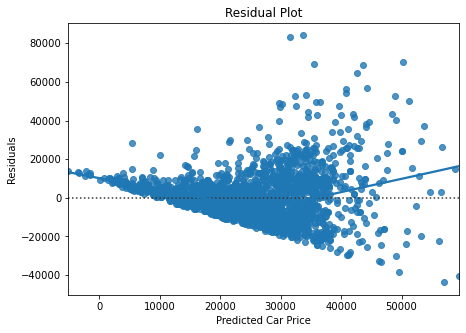

In [350]:
#Plot do modelo
plt.figure(figsize=(7,5))
sns.residplot(Y_pred2, Y_teste-Y_pred2, lowess=True)
plt.xlabel('Predicted Car Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

Depois de plotar o gráfico temos que ver como o nosso modelo se desempenhou, para isso vamos usar a função '.score()', que vai nos informar o coeficiente R^2 das previsões.

In [351]:
treino = modelo_inicial.score(X_treinamento, Y_treinamento)
print(f'O score da regressão linear múltipla do nosso treinamento foi de: {treino}')

O score da regressão linear múltipla do nosso treinamento foi de: 0.3507602311085324


In [352]:
final = modelo_inicial.score(X_teste, Y_teste)
print(f'O score da regressão linear múltipla do nosso teste foi de: {final}')

O score da regressão linear múltipla do nosso teste foi de: 0.34562628760732483


Como podemos perceber o score do modelo 1 e desse segundo modelo se aproximam muito, o que comprova que não houve erro de cálculo ou de implementação do modelo, uma vez que calculamos ele de duas maneiras distintas e chegamos ao mesmo resultado. Com isso podemos afirmar com mais certeza ainda de que, caso os pontos levantados anteriormente, sobre os motivos que levam o nosso modelo ao erro, fossem alterados, teríamos um score maior e portanto, um resultado mais satisfatório.

**Random Forest Regressor**

Random Forest Regressor é um método que combina previsões de diversos outros algoritmos de machine learning, chegando a uma previsão mais precisa do que de um único modelo, podemos ver uma simplificação de como funciona o método na imagem abaixo

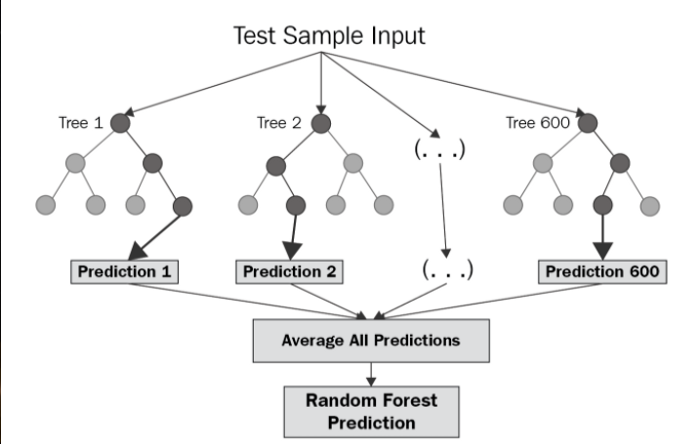

In [353]:
from IPython.display import Image
Image(filename='1_ZFuMI_HrI3jt2Wlay73IUQ.png')

O diagrama acima mostra o funcionamento do método que vamos implementar, como podemos ver, as árvores se desenvolvem sem interagir entre si. Depois que todas as árvores forem desenvolvidas e apresentarem uma previsão durante o treinamento, o algoritmo do Random Forest Regression vai pegar todas as previsões e fazer uma média, chegando à previsão do Random Forest Regression.

Para dar início ao nosso método vamos separar o dataset em treinamento e teste, para isso já vamos aproveitar os dados coletados nos métodos anteriores para colocar apenas as variáveis mais influentes e importantes!

In [354]:
X_teste_restringido = dados_teste[["Prod. year", 'Mileage', 'Cylinders',
                    'Engine volume', 'Manual', 'No', 'Yes']]

X_treinamento_restringido = dados_treinamento[["Prod. year", 'Mileage', 'Cylinders',
                    'Engine volume', 'Manual',  'No', 'Yes']]

Y_teste = dados_teste['Price']

Y_treinamento = dados_treinamento['Price']

Depois de separado vamos dar início ao treinamento do nosso modelo, como queremos que ele seja o mais preciso possível vamos colocar que `n_estimators = 1000`, isso significa que vamos criar 1000 árvores diferentes, cada uma independente da outra, e depois, como dito anteriormente, o nosso modelo vai tirar uma média da previsão dessas 1000 árvores e entregar uma previsão dele.

Obs: a próxima célula pode demorar um pouco!

In [355]:
regressor = RandomForestRegressor(n_estimators = 1000)
regressor.fit(X_treinamento_restringido, Y_treinamento)

RandomForestRegressor(n_estimators=1000)

Depois de fazer o treinamento chegou a hora de fazer a nossa previsão!

In [356]:
Y_pred = regressor.predict(X_teste_restringido)

Agora vamos checar o nosso desempenho!

In [357]:
random = r2_score(Y_teste, Y_pred)
print(f'O score da previsão do Random Forest Regressor foi: {random}')

O score da previsão do Random Forest Regressor foi: 0.4851679016957332


Uau que diferença para os outros modelos!
Vamos ver como ficaram os erros desse modelo!

In [358]:
erro = np.sqrt(mean_squared_error(Y_teste,Y_pred))
erro2 = mean_absolute_error(Y_teste,Y_pred)

In [359]:
print(f'O erro quadrático médio é: {erro:.2f}')
print(f'O erro absoluto médio é: {erro2:.2f}')

O erro quadrático médio é: 10894.44
O erro absoluto médio é: 6673.76


Para finalizar a nossa análise vamo fazer um histograma que ajuda a entender a diferença entre os valores previstos e os valores reais!

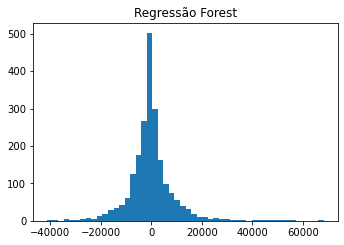

In [360]:
plt.rcParams['figure.figsize'] = (12,8)
 
#Regressão Forest
plt.subplot(221)
plt.title('Regressão Forest')
plt.hist(Y_teste - y_predr, bins = 50);

Analisando esse terceiro método aplicado podemos dizer que ele é bem mais satisfatório que os outros, mesmo utilizando as mesmas variáveis e parâmetros dos outros modelos, o modelo Random Forest Regressor conseguiu aumentar em 15% a taxa de acerto e descer em cerca de 2mil dólares o erro absoluto médio e o erro quadrático médio!

Além disso conseguimos chegar a uma precisão de cerca de 50% com variáveis que, pelo o que o nosso próprio heatmap mostra, não possuem uma correlação tão alta, ou seja, não são muito boas para serem usadas para fazer previsões.

<div id="conclusao"></div>

## Conclusão 





Ao longo do semestre, em Ciência dos dados, pudemos colocar em prática muitas habilidades e conhecimentos, entre esses está a noção de que nem sempre o código funcional é aquele que retorna uma taxa altíssima de acerto, ou o contrário, aquele que retorna uma taxa baixíssima é um código ruim, tendo isso em mente:
 
   Encerrando o nosso trabalho, temos algumas conclusões e pontos a serem levantados e analisados após a utilização de tais métodos. O primeiro e mais importante ponto a ser levantado é a taxa de precisão dos métodos não serem tão elevadas, esse fato ocorre devido à falta de correlação entre as próprias variáveis dentro do dataset, e podemos observar essa afirmação na matriz de calor. A mesma indica que as melhores correlações que temos ainda sim não são elevadas, e como consequência não conseguem "ensinar" nem serem previstas de maneira 100% precisa pelo código construído.
       
   Analisando ambos os métodos podemos perceber que no primeiro obtivemos um R² de 0.3315996589727004, o que indica uma precisão de cerca de 33%, o que não é alto, mas o motivo foi explicado anteriormente. A partir da análise da matriz de calor e de nossos pairplots pudemos chegar em algumas conclusões e algumas informações que nos seriam muito úteis para responder a nossa pergunta inicial, entre essas informações está a correlação entre as variáveis com a nossa variável target, no caso preço, e essa correlação nos mostrou quais seriam as variáveis mais relevantes e mais necessárias para analisarmos e relacionarmos com o preço.
    
   A partir disso, conseguimos concluir os dois métodos com noções que obtemos previamente sobre as variáveis ideais, e desta forma podemos concluir dizendo que um dataset com variáveis mais relacionadas e dependentes de si terão uma taxa de precisão mais alta, utilizando esses mesmos métodos.

<div id="referencias"></div>

## Referêcias

[base de dados] - https://www.kaggle.com/sidharth178/car-prices-dataset

[modelo 1] - Ciência dos dados - Aula 24

[modelo 2] - https://levelup.gitconnected.com/beginners-guide-to-simple-and-multiple-linear-regression-models-d2d5dbe9e704

[modelo 3] - https://levelup.gitconnected.com/random-forest-regression-209c0f354c84

[Heatmap] - https://stackoverflow.com/questions/33282368/plotting-a-2d-heatmap-with-matplotlib

[NumPy] - https://numpy.org/

[Seaborn] - https://seaborn.pydata.org/

[scikit-learn] - https://scikit-learn.org/stable/index.html

[dummy] - https://www.geeksforgeeks.org/how-to-create-dummy-variables-in-python-with-pandas/